In [ ]:
#COMMAND LINE TWITTERSCRAPER CODE: twitterscraper "climate change from:bouldergobldr" --lang en -o boulder_dot.JSON -l 400

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import json      # library for working with JSON-formatted text strings
import pprint as pp    # library for cleanly printing Python data structures
import seaborn as sns


# This is a basic test for https://github.com/taspinar/twitterscraper. Using the demo data looking at all tweets re. Trump. 

# twitterscraper "climate change from:metrolosangeles" --lang en -o cc_test.JSON -l 100

In [ ]:
#this loads the data into json in the notebook

with open('cc_test.JSON') as f:
 data1 = json.load(f)

print(type(data1))

In [ ]:
# print(data[:500])

# pp.pprint(data)

# 
# 
# 
# #wordcloud
# 
# 
# 
# 

# In[94]:


#for x in data:
  # print(x['text'])


# In[4]:


d = {'username': [x['username'] for x in data1],
    'time': [x['timestamp'] for x in data1],
    'tweet': [x['text'] for x in data1],
    'likes': [x['likes'] for x in data1],
    'replies': [x['replies'] for x in data1]
    }

df = pd.DataFrame.from_dict(d)
df

In [47]:
# Twitter data that states "climate change"; the scraper loads in requests by user
bocodot_cc = json_to_df_tweets ('bocodot.JSON')
boco_cc = json_to_df_tweets ('boulder_county.json')
boulderdot_cc = json_to_df_tweets('boulder_dot.json')
bocorc_cc = json_to_df_tweets('BoulderCountyRC.json')
boulder_cc = json_to_df_tweets('boulder.json')

In [53]:
def combine_dataframe (df1, df2, df3, df4, df5): #this function smooshes all the dataframes into one using .append()
    d1 = df1.append(df2)
    d2 = d1.append(df3)
    d3 = d2.append(df4)
    d4 = d3.append(df5)
    return d4.drop_duplicates(subset='tweet', keep="first") #the scraper picked up dups, this rectifies that

In [54]:
boulder_tweets = combine_dataframe(bocodot_cc, boco_cc, boulderdot_cc, bocorc_cc, boulder_cc)
boulder_tweets

,username,time,tweet,likes,replies
0,BoCo Transportation,2019-05-03T15:20:28,How does your commute impact climate change? L...,3,0
0,BoulderCounty,2012-02-15T17:03:39,REMINDER: Public comments on the county's draf...,0,0
2,BoulderCounty,2013-03-08T17:04:38,ICYMI: Boulder County awarded 2013 @EPAgov Cli...,0,0
3,BoulderCounty,2013-03-01T00:02:29,Boulder County awarded a 2013 @EPAgov Climate ...,0,0
4,BoulderCounty,2012-10-04T18:52:50,The Boulder County Commissioners will hold a p...,0,0
...,...,...,...,...,...
110,City of Boulder,2018-11-07T20:01:10,Sign-up to join the interactive livestream dur...,4,0
111,City of Boulder,2018-10-27T20:00:37,"How can our ecosystems address, and begin to r...",5,0
112,City of Boulder,2018-10-24T00:55:55,An additional driver for focusing on Climate C...,3,0
113,City of Boulder,2018-10-24T00:39:25,Climate Commitment work is primarily funded th...,2,0


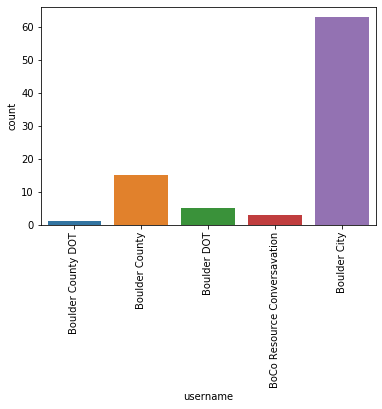

In [60]:
ax = sns.countplot(x='username', data=boulder_tweets)
ax.set_xticklabels(labels=['Boulder County DOT', 'Boulder County', 'Boulder DOT', 'BoCo Resource Conversavation',
                           'Boulder City'], rotation=90)
plt.show()

In [62]:
boulder_tweets.sort_values(by= 'time', ascending=True)
#test = sns.tsplot(data=la_tweets, time="time", unit="username", value="likes")

,username,time,tweet,likes,replies
0,GO Boulder,2011-01-06T23:31:48,"RT @Mickey_Oh: truth. ""Blaming China for clima...",0,0
61,City of Boulder,2011-11-07T20:04:13,RT @barneshead: RT @EnergyCollectiv: Check out...,0,0
0,BoulderCounty,2012-02-15T17:03:39,REMINDER: Public comments on the county's draf...,0,0
60,City of Boulder,2012-05-09T19:16:02,"May 9, 2012 - City invites public to learn abo...",0,0
6,City of Boulder,2012-09-19T00:16:24,Climate change expert Jim Balog is giving coun...,0,0
...,...,...,...,...,...
66,City of Boulder,2019-10-07T19:01:27,Stop by an open house at Chautauqua tomorrow t...,19,1
65,City of Boulder,2019-11-16T21:00:38,Join the city and @bouldercounty on Nov. 20 to...,4,0
17,BoulderCounty,2019-11-18T20:43:47,Yes! Join us for an interactive way to learn a...,2,0
64,City of Boulder,2019-12-06T22:00:38,"Join #Boulder's new, more ambitious efforts to...",3,0


In [ ]:
df['time'].describe()

In [24]:
df["time"] = df["time"].astype("|S")
print(df)
df['time'].describe()

    username                    time  \
0   LA Metro  b'2014-04-01T18:32:47'   
1   LA Metro  b'2014-04-01T18:32:47'   
2   LA Metro  b'2012-10-24T17:51:30'   
3   LA Metro  b'2012-10-24T17:51:30'   
4   LA Metro  b'2017-12-13T23:15:15'   
..       ...                     ...   
58  LA Metro  b'2020-01-22T18:32:35'   
59  LA Metro  b'2019-09-11T02:15:03'   
60  LA Metro  b'2019-08-01T17:20:15'   
61  LA Metro  b'2019-07-29T17:20:12'   
62  LA Metro  b'2019-07-26T19:20:07'   

                                                tweet  likes  replies  
0   TranspoNews: should Metro charge for parking a...      0        2  
1   TranspoNews: should Metro charge for parking a...      0        2  
2   Transpo headlines: climate change non-issue, d...      0        0  
3   Transpo headlines: climate change non-issue, d...      0        0  
4   How We Roll: the future of Metrolink's Claremo...      4        1  
..                                                ...    ...      ...  
58  Metro News 

count                         63
unique                        42
top       b'2020-01-22T18:32:35'
freq                           2
Name: time, dtype: object

In [ ]:
chart = sns.distplot(a = df.time,
                  bins = 20,
                  color = 'orange',
                  kde = False)

In [42]:
for x in la_tweets["time"]:
    print(datetime.strptime(x, "%y-%m%dT%H:%M:%S"))

NameError: name 'la_tweets' is not defined

In [44]:
# In[31]:


#going to try to create a single function to do this 

def json_to_df_tweets (csv_file):
    with open(csv_file) as f:
      data = json.load(f)
    
    d = {'username': [x['username'] for x in data],
        'time': [x['timestamp'] for x in data],
        'tweet': [x['text'] for x in data],
        'likes': [x['likes'] for x in data],
        'replies': [x['replies'] for x in data]
        }
    
    df_Test = pd.DataFrame.from_dict(d)
    
    return df_Test

In [39]:
# In[32]:


# Twitter data that states "climate change"; the scraper loads in requests by user
la_metro_tweets = json_to_df_tweets ('cc_test.JSON')
lacity_tweets = json_to_df_tweets ('lacity_tweets.json')
ladot_tweets = json_to_df_tweets('ladot_tweets.json')
laplanning_tweets = json_to_df_tweets('laplanning_tweets.json')
laport_tweets = json_to_df_tweets('laport_tweets.json')

In [38]:
# Using the function above "json_to_df_tweets" - we'll load all of the LA City tweets with the words "climate change" so that we can merge them together in one large df. 

# lacity_tweets.json /
# lacountyparks_tweets.json /
# ladot_tweets.json /
# laplanning_tweets.json /
# laport_tweets.json

# In[27]:


def combine_dataframe (df1, df2, df3, df4, df5, df6): #this function smooshes all the dataframes into one using .append()
    d1 = df1.append(df2)
    d2 = d1.append(df3)
    d3 = d2.append(df4)
    d4 = d3.append(df5)
    d5 = d4.append(df6)
    return d5.drop_duplicates(subset='tweet', keep="first") #the scraper picked up dups, this rectifies that


# In[28]:


la_tweets = combine_dataframe(ladot_tweets, la_metro_tweets, lacity_tweets, lacountyparks_tweets, laplanning_tweets, laport_tweets)
la_tweets


# We have all the tweets from LA city agencies that mention climate change. 

# In[43]:


ax = sns.countplot(x='username', data=la_tweets)
ax.set_xticklabels(labels=['LADOT', 'Metro', 'City', 'Parks', 'Planning', 'Port'], rotation=30)
plt.show()


# In[49]:


la_tweets.sort_values(by= 'time', ascending=True)
#test = sns.tsplot(data=la_tweets, time="time", unit="username", value="likes")

NameError: name 'lacountyparks_tweets' is not defined